<a href="https://colab.research.google.com/github/tuananh1006/Probability/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn


In [2]:
from sklearn import datasets

In [3]:
X,y =datasets.load_digits(return_X_y=True)

In [5]:
X.shape,y.shape

((1797, 64), (1797,))

In [6]:
n=1797
d=64

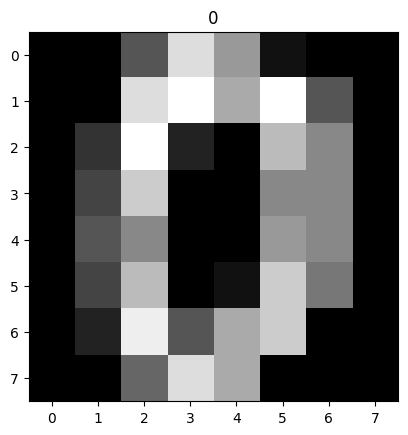

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(8,8),cmap='gray')
label=y[0]
plt.title(label)
plt.show()


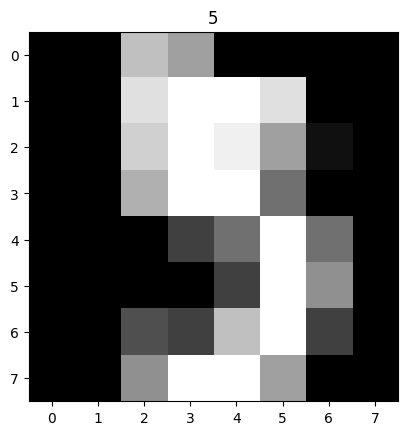

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X[5].reshape(8,8),cmap='gray')
label=y[5]
plt.title(label)
plt.show()


In [15]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [17]:
clf.score(X_test,y_test)

0.9583333333333334

In [20]:
clf.predict([X_test[0]])

array([2])

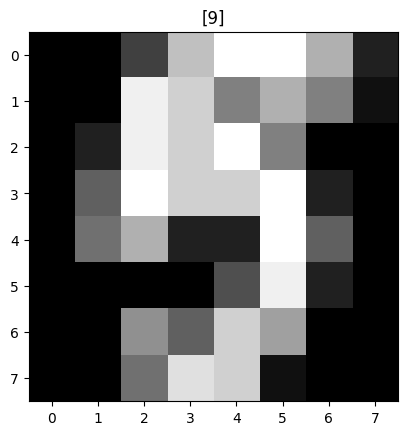

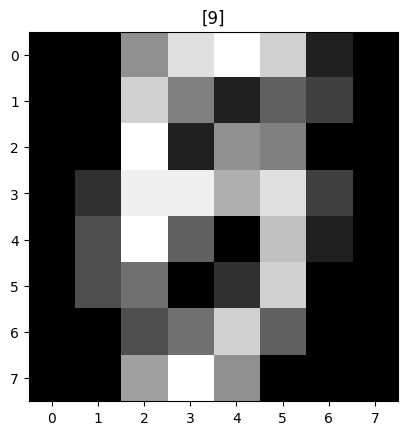

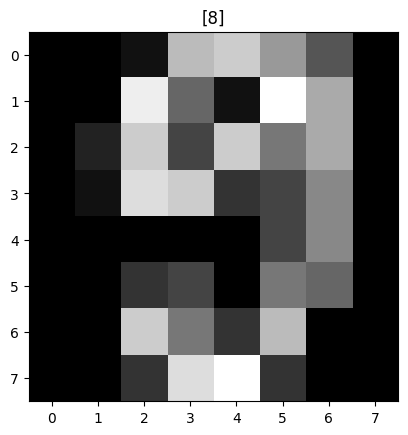

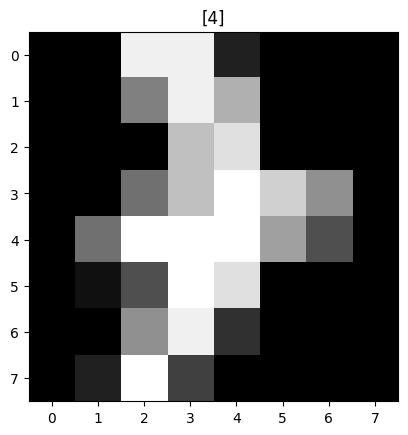

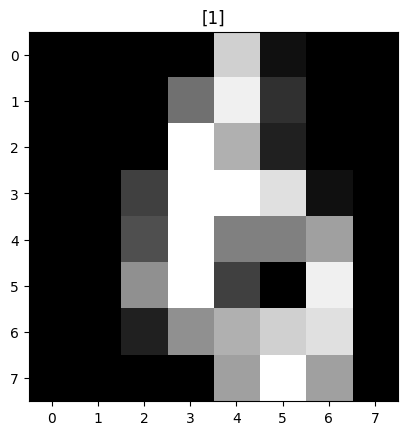

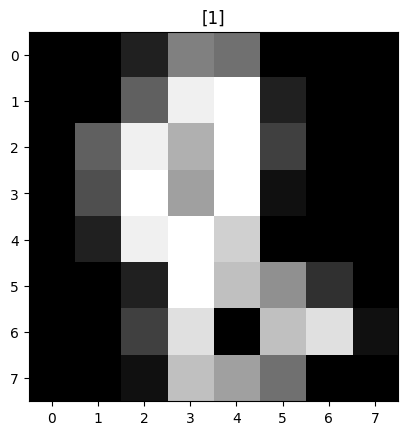

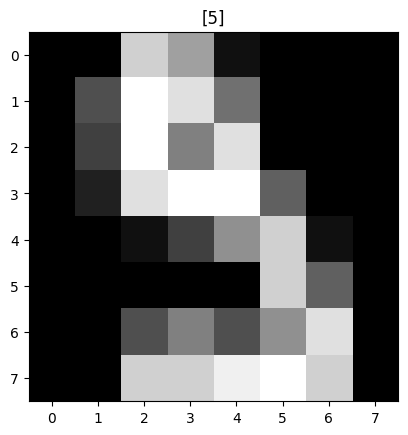

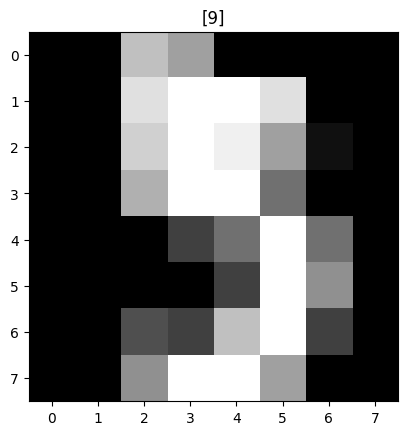

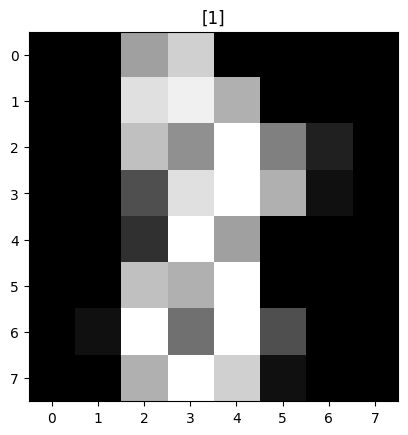

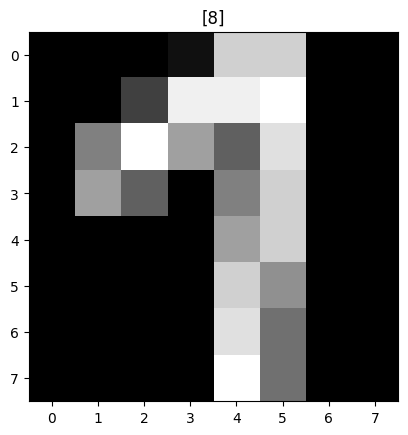

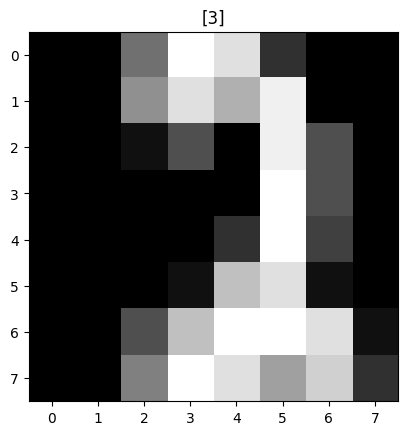

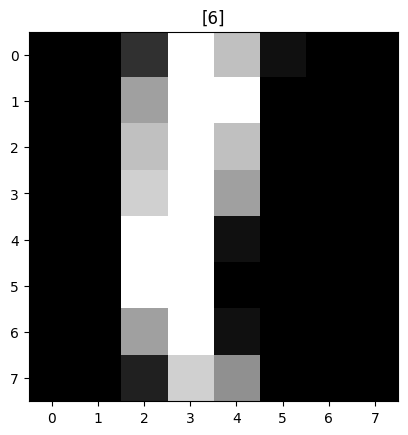

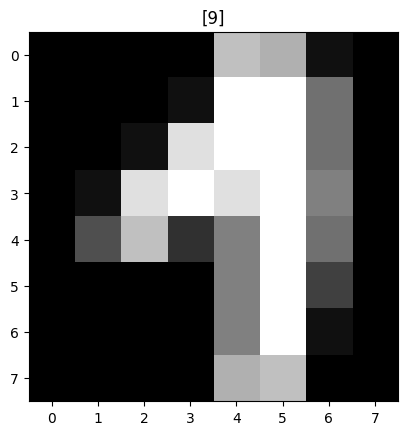

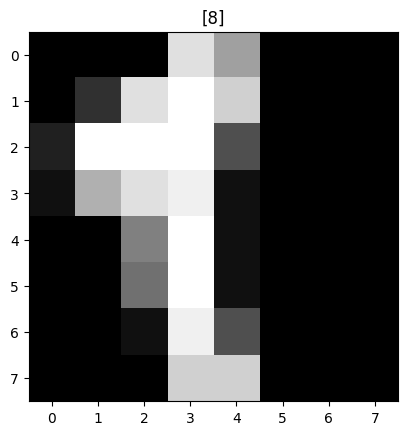

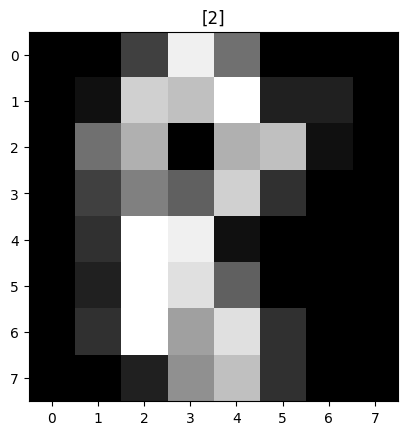

In [23]:
for i,label in zip(X_test,y_test):
  predict=clf.predict([i])
  if predict==label:
    continue
  plt.imshow(i.reshape(8,8),cmap='gray')
  plt.title(predict)
  # plt.title(label)
  plt.show()

In [24]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9583333333333334

In [27]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.9583333333333334

In [48]:
X_test.shape

(360, 64)

In [60]:
def draw_samples(X, ytrue, ypred):
  fig, axes = plt.subplots(3, 5, figsize=(10, 10))
  # Adjust the number of rows (3) and columns (5) as needed

  for i in range(min(len(X), 15)):  # Limit to 15 subplots or less
    axes.flatten()[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes.flatten()[i].set_title(f"Predict:{ypred[i]}, Label:{ytrue[i]}")

  plt.tight_layout()  # Adjust spacing
  plt.show()

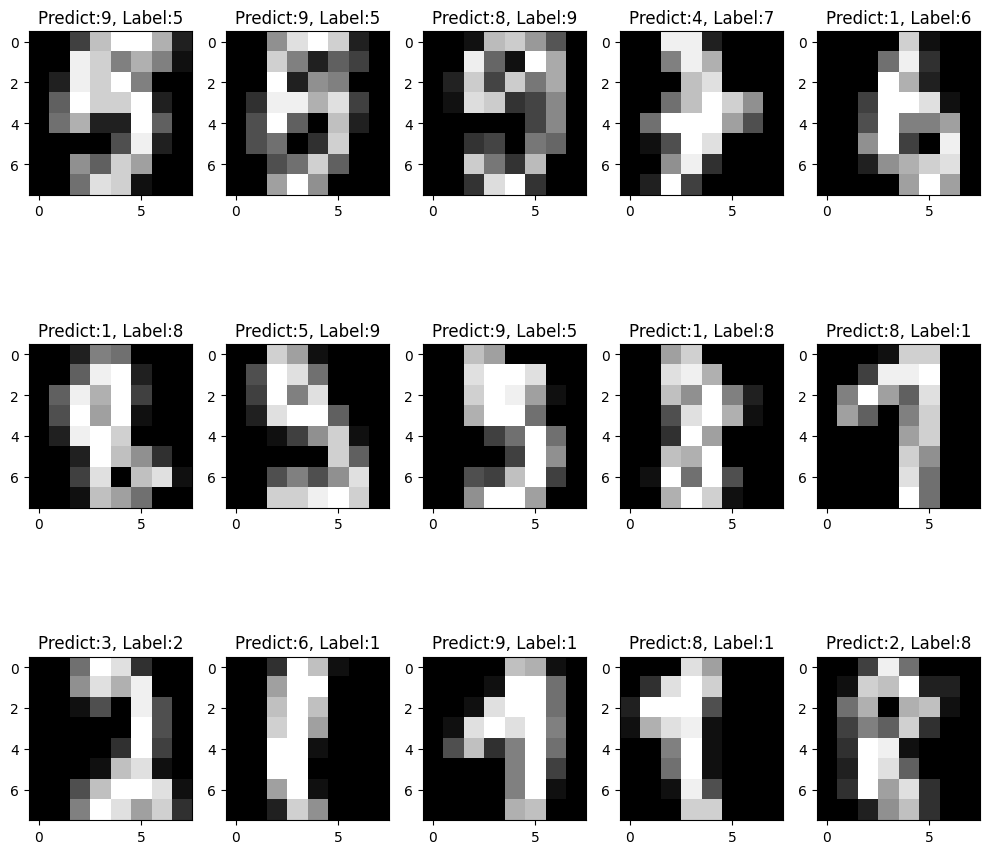

In [61]:
y_pred=clf.predict(X_test)
mask=y_pred!=y_test
draw_samples(X_test[mask,:],y_test[mask],y_pred[mask])

# From Scratch

## Classify 0 and 8


In [64]:
mask=(y==0)|(y==8)
X08=X[mask,:]
y08=y[mask]


In [104]:
from collections import Counter
Counter(y08)

Counter({0: 178, 8: 174})

In [65]:
X08.shape

(352, 64)

In [66]:
from sklearn.model_selection import train_test_split
X08_train,X08_test,y08_train,y08_test=train_test_split(X08,y08,test_size=0.2,random_state=0)

In [105]:
from collections import Counter
Counter(y08_train)

Counter({8: 144, 0: 137})

In [67]:
X08_train.shape

(281, 64)

In [69]:
import numpy as np
def gradient_w0(X,y,y_pred):
  return np.sum(y_pred-y)

def gradient_w(X,y,y_pred):
  return np.dot(X.T,(y_pred-y))

In [300]:
w=np.zeros(64)
w0=np.zeros(1)
batch_size=40
epsilon=0.1
for epoch in range(1):
  for i in range(0,len(X08_train)-batch_size,batch_size):
    batch=X08_train[i:i+batch_size]
    batch_y=y08_train[i:i+batch_size]
    y_pred=np.dot(batch,w)+w0
    y_pred=np.where(y_pred>0,8,0)
    grad_w=gradient_w(batch,batch_y,y_pred)
    grad_w0=gradient_w0(batch,batch_y,y_pred)
    w=w-epsilon*grad_w
    w0=w0-epsilon*grad_w0
    print(f"Batch:{i}")
    print(accuracy_score(batch_y,y_pred))

Batch:0
0.425
Batch:40
0.7
Batch:80
0.475
Batch:120
0.6
Batch:160
0.925
Batch:200
0.975
Batch:240
1.0


In [301]:
def predict(X,w,w0):
  y_pred=np.dot(X,w)+w0
  y_pred=np.where(y_pred>0,8,0)
  return y_pred

In [302]:
w,w0

(array([   0. ,    2.4,   76.8,  -44.8,   30.4,  110.4,   14.4,    0. ,
           0.8,   24. ,   24. ,  -32. ,  -20. ,   16.8,   36.8,    0. ,
           0. ,  -14.4,  -79.2,  100. ,  214.4,  -19.2,  -52. ,    0. ,
           0. , -110.4, -124. ,  343.2,  376. ,  -85.6, -182.4,    0. ,
           0. , -162.4, -196. ,  392.8,  384.8, -136. , -220. ,    0. ,
           0. ,  -86.4, -100. ,  223.2,  247.2,  -88. , -140.8,    0. ,
           0. ,    4. ,  -62.4,  -71.2,  -66.4, -119.2,  -11.2,    0. ,
           0. ,    4.8,   60.8,   -6.4,   -9.6,   52. ,   30.4,    1.6]),
 array([1.6]))

In [303]:
y08_pred=predict(X08_test,w,w0)

In [304]:
from sklearn.metrics import accuracy_score
accuracy_score(y08_test,y08_pred)

1.0

In [305]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y08_test,y08_pred)

array([[41,  0],
       [ 0, 30]])

In [306]:
from sklearn.metrics import classification_report
print(classification_report(y08_test,y08_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        30

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

